In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

df = pd.read_csv('../data/NASA Near-Earth Objects-CleanbyThang.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 23999 non-null  int64  
 1   absolute_magnitude_h               23999 non-null  float64
 2   is_potentially_hazardous_asteroid  23999 non-null  bool   
 3   is_sentry_object                   23999 non-null  bool   
 4   kilometers_estimated_diameter_min  23999 non-null  float64
 5   kilometers_estimated_diameter_max  23999 non-null  float64
 6   orbit_class_type                   23999 non-null  object 
 7   perihelion_distance                23999 non-null  float64
 8   aphelion_distance                  23999 non-null  float64
 9   first_observation_date             23999 non-null  object 
 10  last_observation_date              23999 non-null  object 
 11  orbit_class_description            23999 non-null  obj

In [3]:
# chuyển đổi các biến phân loại thành dạng category
df['orbit_class_type'] = df['orbit_class_type'].astype('category')
#chuyển ngày thành dạng datetime
df['first_observation_date'] = pd.to_datetime(df['first_observation_date'])
df['last_observation_date'] = pd.to_datetime(df['last_observation_date'])

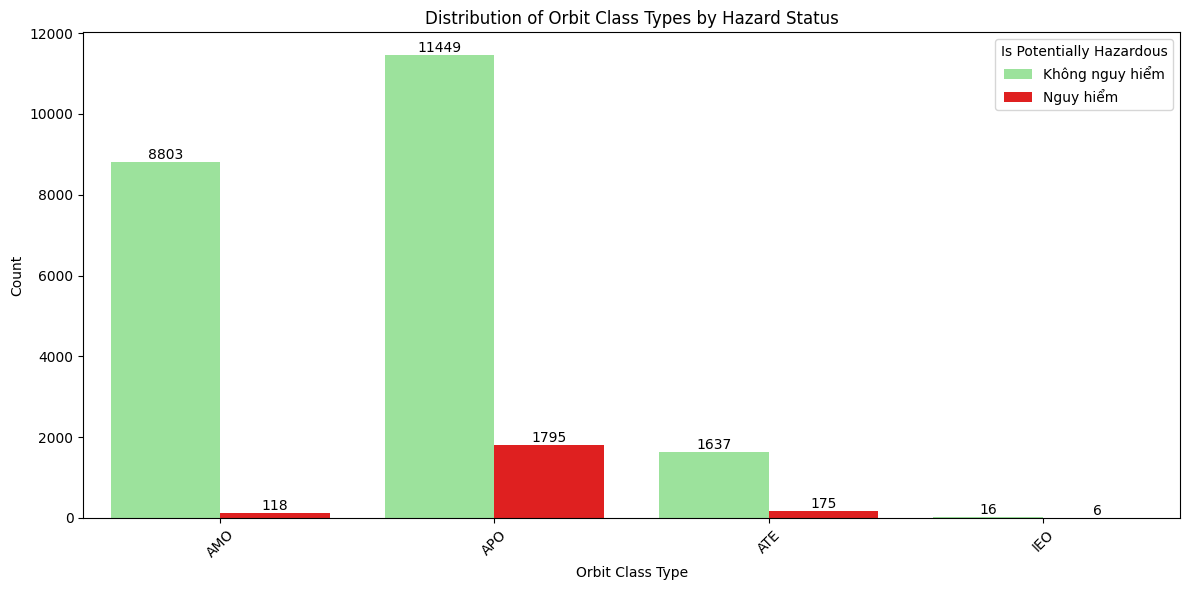

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='orbit_class_type', hue='is_potentially_hazardous_asteroid',
              palette=['lightgreen', 'red'])  # Đổi màu thành xanh lá và đỏ
plt.title('Distribution of Orbit Class Types by Hazard Status')
plt.xlabel('Orbit Class Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Potentially Hazardous',
          labels=['Không nguy hiểm', 'Nguy hiểm'])  # Điều chỉnh nhãn
plt.gca().bar_label(plt.gca().containers[0])
plt.gca().bar_label(plt.gca().containers[1])
plt.tight_layout()
plt.show()

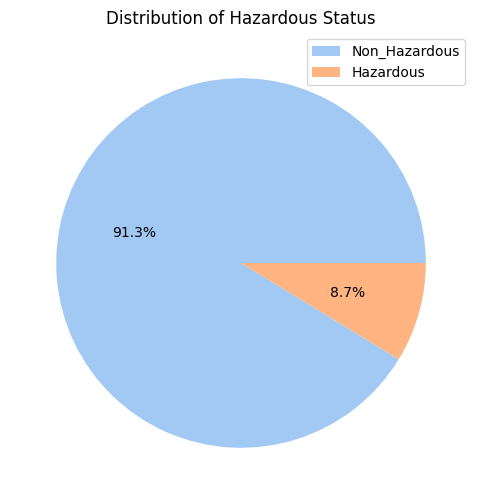

In [5]:
plt.figure(figsize=(12,6))
plt.pie(df['is_potentially_hazardous_asteroid'].value_counts(), autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Hazardous Status')
plt.legend(['Non_Hazardous', 'Hazardous'], loc='upper right')
plt.show()


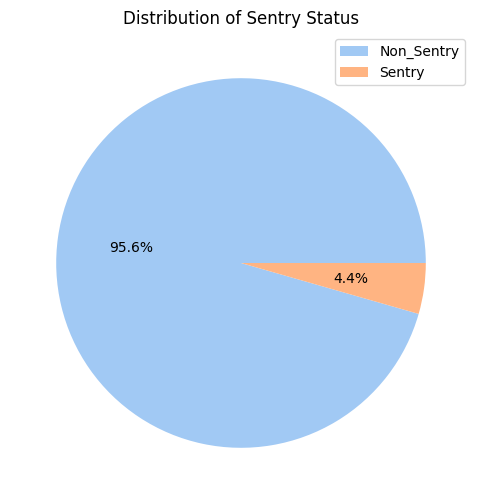

In [6]:
plt.figure(figsize=(12,6))
plt.pie(df['is_sentry_object'].value_counts(), autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Sentry Status')
plt.legend(['Non_Sentry', 'Sentry'], loc='upper right')
plt.show()

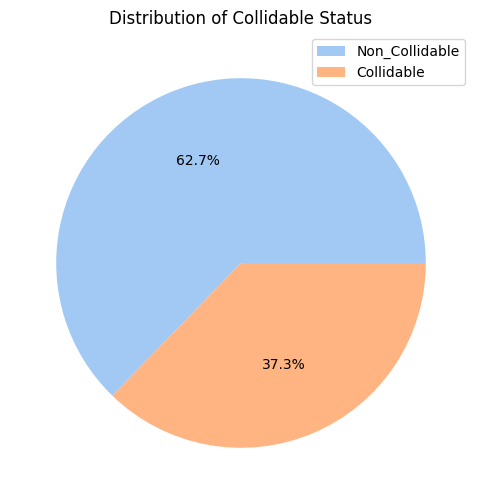

In [7]:
plt.figure(figsize=(12,6))
plt.pie(df['is_collidable'].value_counts(), autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Collidable Status')
plt.legend(['Non_Collidable', 'Collidable'], loc='upper right')
plt.show()

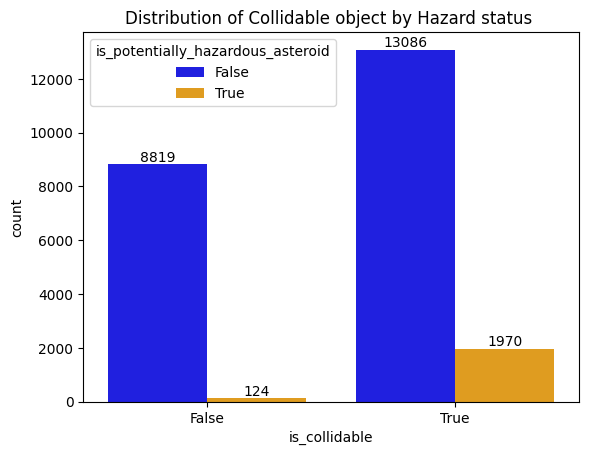

In [8]:
sns.countplot(data=df, x='is_collidable', hue='is_potentially_hazardous_asteroid',palette=['blue', 'orange'])
plt.title('Distribution of Collidable object by Hazard status ')
plt.gca().bar_label(plt.gca().containers[0])
plt.gca().bar_label(plt.gca().containers[1])
plt.show()

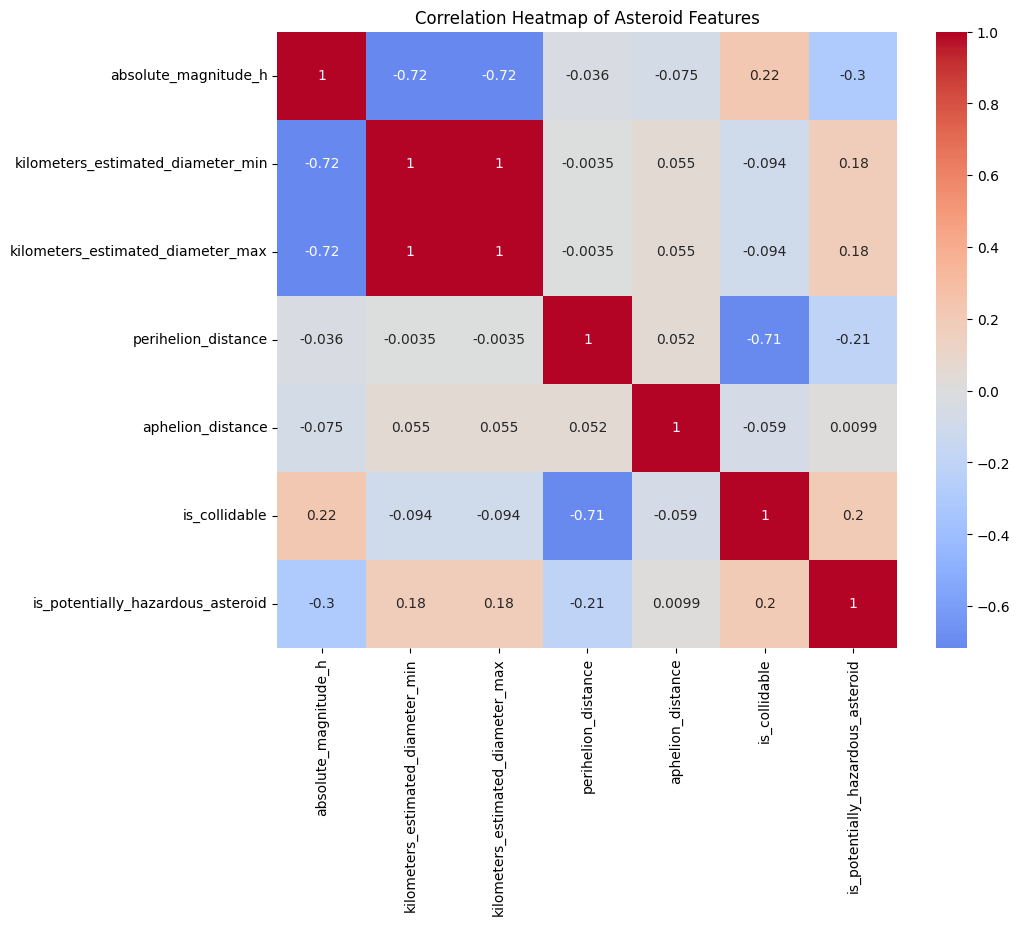

In [9]:
cols = ['absolute_magnitude_h', 'kilometers_estimated_diameter_min',
                'kilometers_estimated_diameter_max', 'perihelion_distance', 
                'aphelion_distance','is_collidable','is_potentially_hazardous_asteroid']
correlation = df[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Asteroid Features')
plt.show()

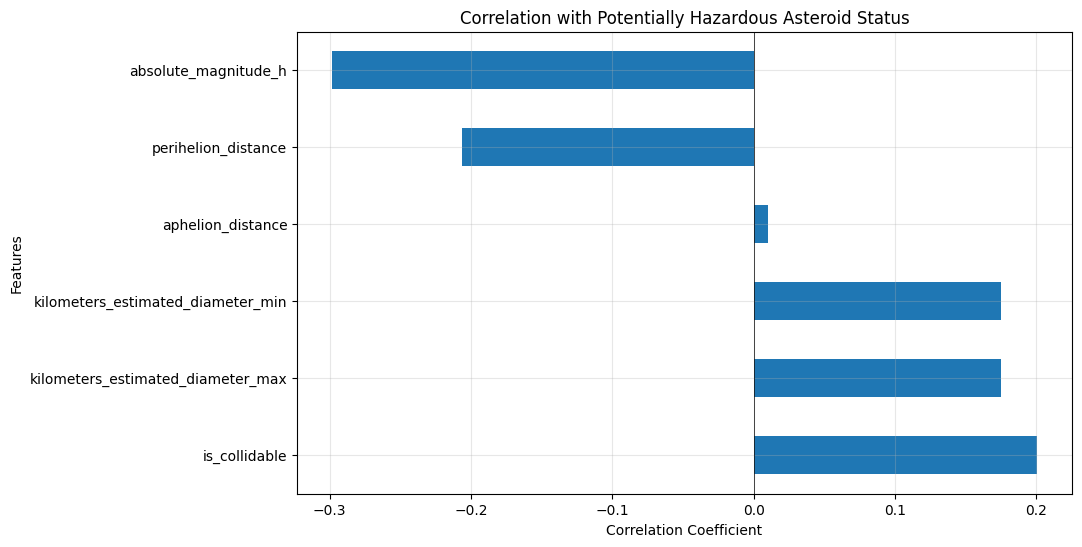

In [10]:
cols = ['absolute_magnitude_h', 'kilometers_estimated_diameter_min',
        'kilometers_estimated_diameter_max', 'perihelion_distance', 
        'aphelion_distance', 'is_potentially_hazardous_asteroid', 'is_collidable']

# Tính toán tương quan
correlation = df[cols].corr()

# Chỉ lấy hàng is_potentially_hazardous_asteroid
correlation_hazard = correlation['is_potentially_hazardous_asteroid'].sort_values(ascending=False)

# Vẽ biểu đồ thanh ngang
plt.figure(figsize=(10, 6))
correlation_hazard[correlation_hazard.index != 'is_potentially_hazardous_asteroid'].plot(kind='barh')
plt.title('Correlation with Potentially Hazardous Asteroid Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10020\1196502621.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_distances = df.groupby('orbit_class_type')[['perihelion_distance', 'aphelion_distance']].mean()


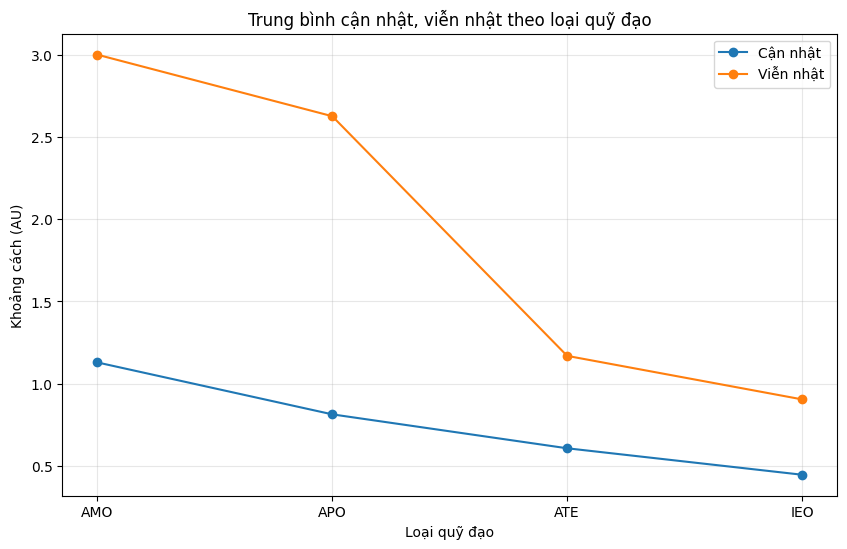

In [11]:
# Tạo dữ liệu trung bình theo orbit_class_type
avg_distances = df.groupby('orbit_class_type')[['perihelion_distance', 'aphelion_distance']].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_distances.index, avg_distances['perihelion_distance'], marker='o', label='Cận nhật')
plt.plot(avg_distances.index, avg_distances['aphelion_distance'], marker='o', label='Viễn nhật')
plt.title('Trung bình cận nhật, viễn nhật theo loại quỹ đạo')
plt.xlabel('Loại quỹ đạo')
plt.ylabel('Khoảng cách (AU)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

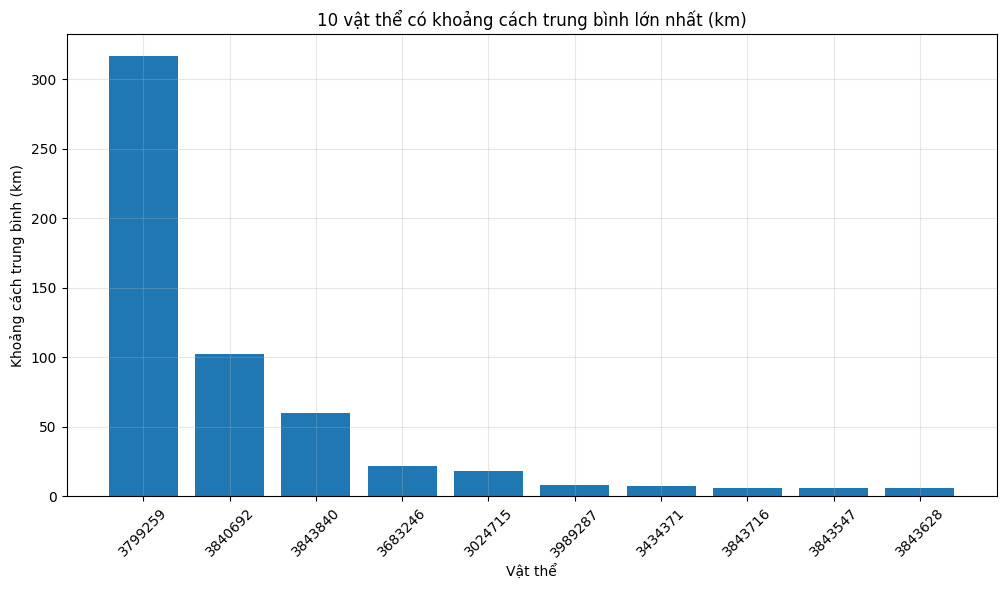

In [12]:
# Tính khoảng cách trung bình
df['avg_distance'] = (df['perihelion_distance'] + df['aphelion_distance']) / 2

# Lấy 10 vật thể có khoảng cách trung bình lớn nhất
top_10_distances = df.nlargest(10, 'avg_distance')

plt.figure(figsize=(12, 6))
plt.bar(range(10), top_10_distances['avg_distance'])
plt.title('10 vật thể có khoảng cách trung bình lớn nhất (km)')
plt.xlabel('Vật thể')
plt.ylabel('Khoảng cách trung bình (km)')
plt.xticks(range(10), top_10_distances['id'], rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

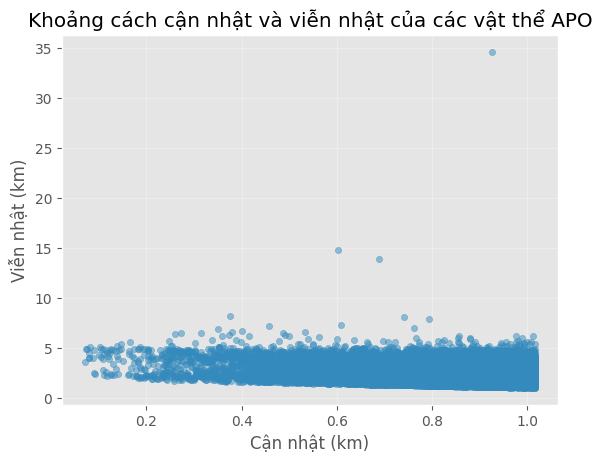

In [13]:
import matplotlib as mpl

APO = df.loc[df['orbit_class_type'] == 'APO']

mpl.style.use('ggplot')

APO.plot(kind='scatter', x='perihelion_distance', y='aphelion_distance', alpha=0.5)
plt.title('Khoảng cách cận nhật và viễn nhật của các vật thể APO')
plt.xlabel('Cận nhật (km)')
plt.ylabel('Viễn nhật (km)')
plt.grid(True, alpha=0.3)
plt.show()



In [14]:
# # Tạo DataFrame với số lượng vật thể theo loại quỹ đạo và trạng thái nguy hiểm
# orbit_hazard_counts = df.groupby(['orbit_class_type', 'is_potentially_hazardous_asteroid']).size().unstack()

# # Vẽ area plot với màu sắc tùy chỉnh
# plt.figure(figsize=(12, 6))
# orbit_hazard_counts.plot(kind='area', stacked=False,  
#                         color=['lightgreen', 'red'])  

# plt.title('Phân bố vật thể nguy hiểm theo loại quỹ đạo')
# plt.xlabel('Loại quỹ đạo')
# plt.ylabel('Số lượng vật thể')

# # Điều chỉnh legend để hiển thị diện tích
# handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['lightgreen', 'red']]
# plt.legend(handles, ['Không nguy hiểm', 'Nguy hiểm'], 
#           title='Potentially Hazardous')

# plt.grid(True, alpha=0.3)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # In ra bảng số liệu
# print("\nSố lượng vật thể theo loại quỹ đạo và trạng thái nguy hiểm:")
# print(orbit_hazard_counts)

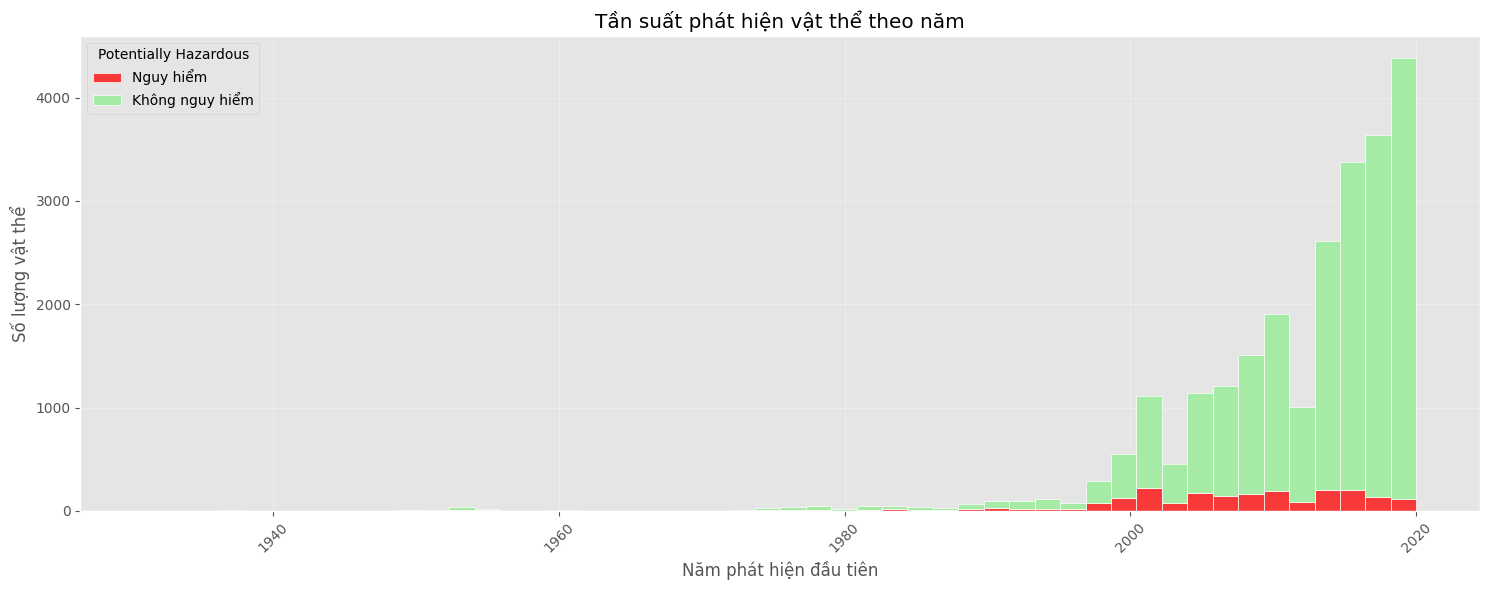


Thống kê theo năm:
is_potentially_hazardous_asteroid   False  True 
first_observation_year                          
1931                                  NaN    1.0
1934                                  1.0    1.0
1936                                  NaN    1.0
1937                                  1.0    2.0
1949                                  NaN    1.0
...                                   ...    ...
2016                               1725.0   99.0
2017                               1841.0   88.0
2018                               1664.0   48.0
2019                               2219.0   62.0
2020                               2043.0   55.0

[67 rows x 2 columns]


In [15]:
# Trích xuất năm từ cột first_observation_date
df['first_observation_year'] = pd.to_datetime(df['first_observation_date']).dt.year

# Vẽ histogram
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='first_observation_year', 
            hue='is_potentially_hazardous_asteroid',
            multiple="stack",  # Xếp chồng các cột
            palette=['lightgreen', 'red'],  # Giữ nhất quán màu sắc
            bins=50,
            edgecolor='white')  # Điều chỉnh số lượng bins

plt.title('Tần suất phát hiện vật thể theo năm')
plt.xlabel('Năm phát hiện đầu tiên')
plt.ylabel('Số lượng vật thể')

# Điều chỉnh legend
plt.legend(title='Potentially Hazardous',
          labels=['Nguy hiểm', 'Không nguy hiểm'])

plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# In thống kê
print("\nThống kê theo năm:")
yearly_stats = df.groupby(['first_observation_year', 'is_potentially_hazardous_asteroid']).size().unstack()
print(yearly_stats)

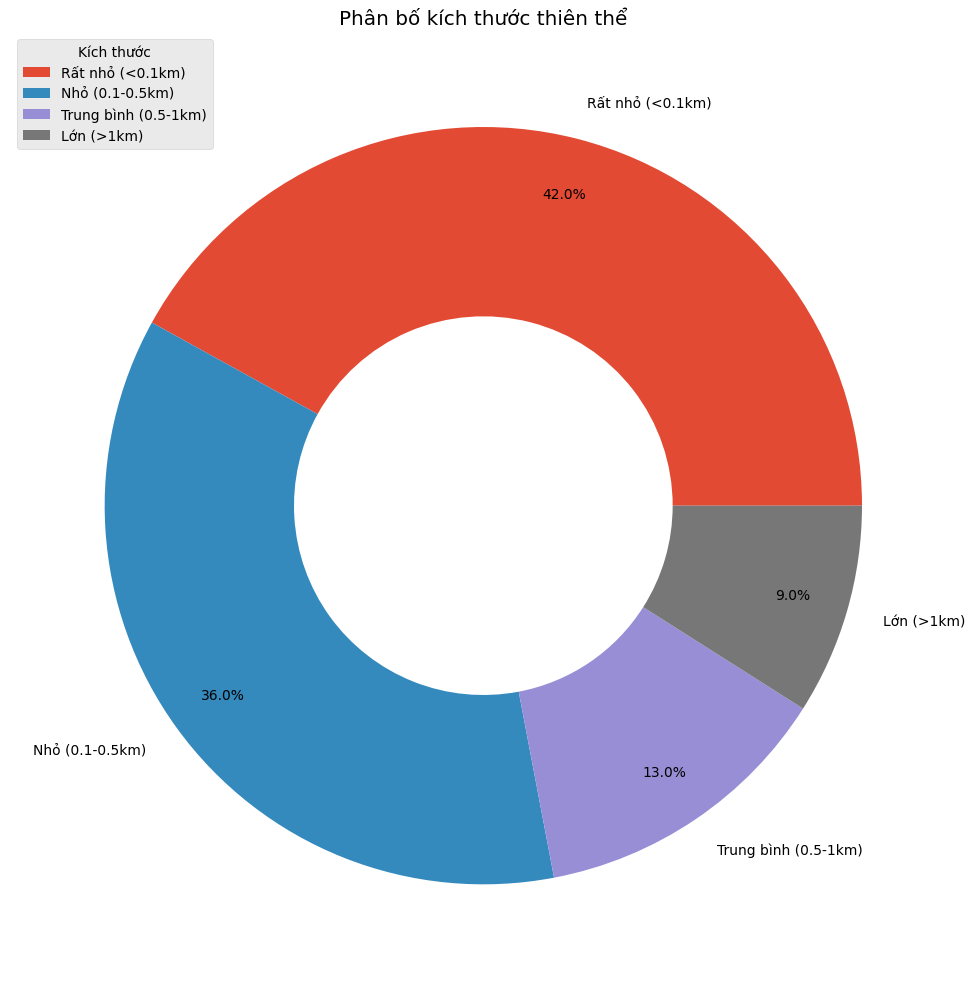

In [18]:
# Tạo các nhóm kích thước
def size_category(diameter):
    if diameter < 0.1:
        return 'Rất nhỏ (<0.1km)'
    elif diameter < 0.5:
        return 'Nhỏ (0.1-0.5km)'
    elif diameter < 1:
        return 'Trung bình (0.5-1km)'
    else:
        return 'Lớn (>1km)'

df['size_category'] = df['kilometers_estimated_diameter_max'].apply(size_category)
size_ratio = df['size_category'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(size_ratio,
        labels=size_ratio.index,
        autopct='%1.1f%%',
        pctdistance=0.85,
        wedgeprops=dict(width=0.5))
plt.title('Phân bố kích thước thiên thể')
plt.legend(title='Kích thước', loc='upper left')
plt.tight_layout()
plt.show()